In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("stress.csv")

In [2]:
data

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [3]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from nltk.corpus import stopwords

In [5]:
import string

In [6]:
stopword=set(stopwords.words('english'))

In [7]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

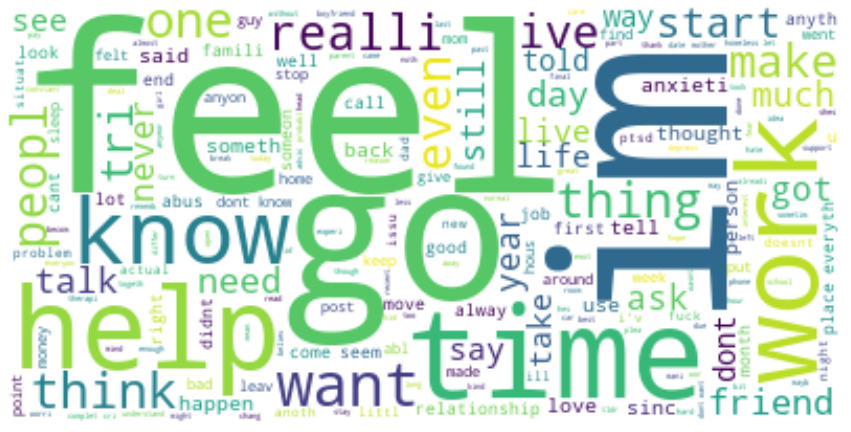

In [9]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
data["label"]=data["label"].map({0:"No Stress",1:"Stress"})

In [11]:
data=data[["text","label"]]

In [12]:
data

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
...,...,...
2833,week ago precious ignor jan happi year prec...,No Stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [14]:
x=np.array(data["text"])
y=np.array(data["label"])

In [15]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.naive_bayes import BernoulliNB

In [18]:
model = BernoulliNB()

In [19]:
model.fit(xtrain,ytrain)

BernoulliNB()

In [20]:
user = input("Text")

Text i am not feeling well


In [21]:
data=cv.transform([user]).toarray()

In [22]:
output=model.predict(data)

In [23]:
output

array(['No Stress'], dtype='<U9')